<a href="https://colab.research.google.com/github/rifatulhimel/Basic-ML-algo/blob/master/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(0.0, 6.0, 0.0, 20.0)

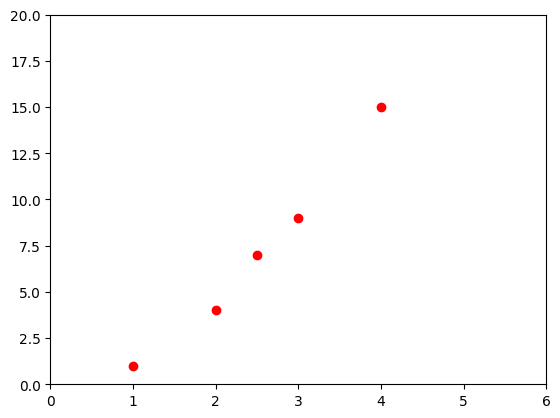

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])

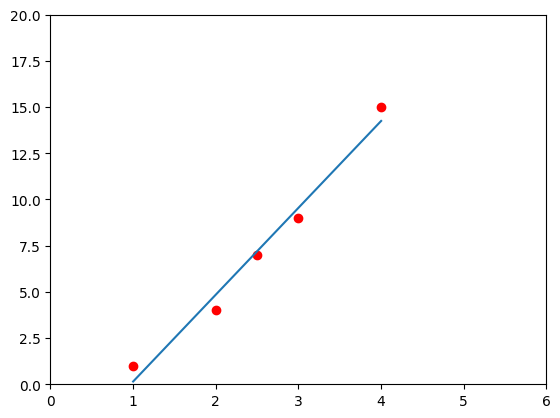

In [ ]:
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [ ]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [ ]:
y_train.head()

,survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
dftrain.loc[0], y_train.loc[0]

(sex                          male
 age                          22.0
 n_siblings_spouses              1
 parch                           0
 fare                         7.25
 class                       Third
 deck                      unknown
 embark_town           Southampton
 alone                           n
 Name: 0, dtype: object,
 0)

In [ ]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [ ]:
dftrain.shape

(627, 9)

In [ ]:
y_train.head()

,survived
0,0
1,1
2,1
3,1
4,0


<Axes: >

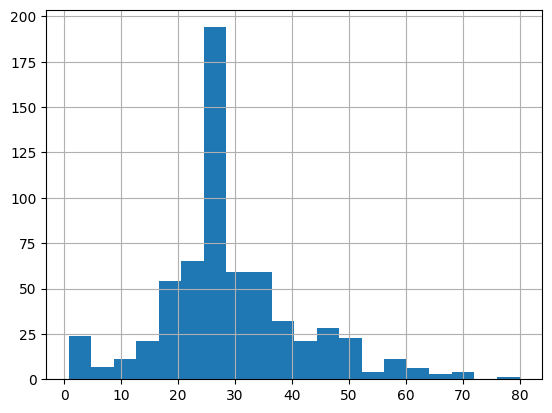

In [ ]:
dftrain.age.hist(bins=20)

<Axes: ylabel='sex'>

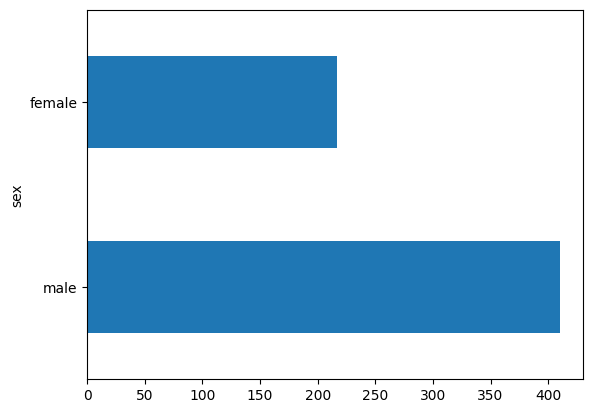

In [ ]:
dftrain.sex.value_counts().plot(kind='barh')

<Axes: ylabel='class'>

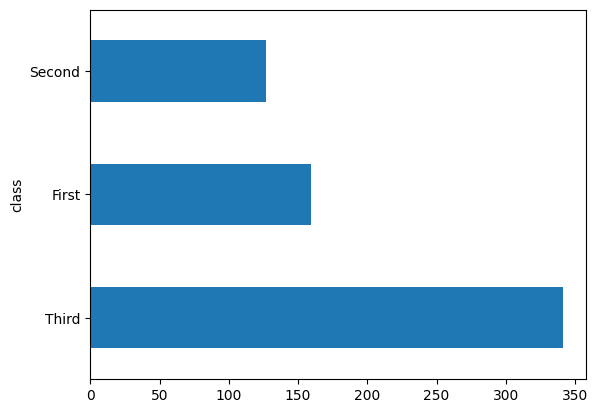

In [ ]:
dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '%survived')

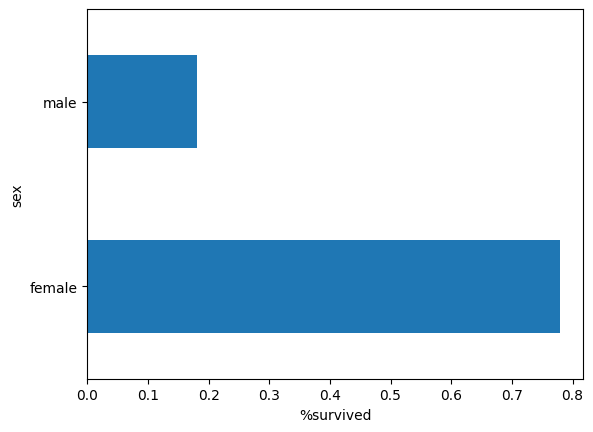

In [ ]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('%survived')

In [ ]:
pd.concat([dftrain, y_train], axis=1)

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone,survived
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n,0
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n,1
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y,1
3,female,35.0,1,0,53.1000,First,C,Southampton,n,1
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y,0
...,...,...,...,...,...,...,...,...,...,...
622,male,28.0,0,0,10.5000,Second,unknown,Southampton,y,0
623,male,25.0,0,0,7.0500,Third,unknown,Southampton,y,0
624,female,19.0,0,0,30.0000,First,B,Southampton,y,1
625,female,28.0,1,2,23.4500,Third,unknown,Southampton,n,0


In [ ]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean()

,survived
sex,
female,0.778802
male,0.180488


In [ ]:
dftrain.shape

(627, 9)

In [ ]:
dfeval.shape

(264, 9)

In [ ]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [ ]:
dftrain[feature_name].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.4583,  21.075 ,
        11.1333,  30.0708,  16.7   ,   8.05  ,  31.275 ,   7.8542,
        29.125 ,  13.    ,  18.    ,   7.225 ,  26.    ,  35.5   ,
        31.3875, 263.    ,   7.8792,   7.8958,  27.7208, 146.5208,
         7.75  ,  10.5   ,  82.1708,  52.    ,   7.2292,  11.2417,
         9.475 ,  21.    ,  41.5792,  15.5   ,  21.6792,  17.8   ,
        39.6875,  76.7292,  61.9792,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  56.4958,
         7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,   7.7875,
        47.1   ,  34.375 ,  61.175 ,  34.6542,  63.3583,  23.    ,
        77.2875,   8.6542,   7.775 ,  24.15  ,  14.4542,  14.4583,
       247.5208,   7.1417,   6.975 ,   7.05  ,  14.5   ,  15.0458,
        26.2833,   9.2167,  79.2   ,   6.75  ,  11.5   ,  12.525 ,
         7.3125,  61.3792,   7.7333,  69.55  ,  16.1   ,  55.    ,
        25.4667,  28.7125,   0.    ,  15.05  ,  22.025 ,  26.5

In [ ]:
dftrain['sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    # Convert pandas DataFrame to dictionary of NumPy arrays
    data = {key: np.array(value) for key, value in data_df.items()}
    # Create dataset from the dictionary of NumPy arrays and labels
    ds = tf.data.Dataset.from_tensor_slices((data, label_df.values))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

In [ ]:
train_input_fn= make_input_fn(dftrain, y_train)
eval_input_fn= make_input_fn(dfeval, y_eval)

In [ ]:
train_input_fn

<function __main__.make_input_fn.<locals>.input_function()>

In [ ]:
dftrain.shape

(627, 9)

In [ ]:
dfeval.shape

(264, 9)

In [ ]:
tf.__version__

'2.15.0'

In [ ]:
!pip install tensorflow==2.15

In [ ]:
import tensorflow as tf
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


In [ ]:
linear_est.train(train_input_fn)
result=linear_est.evaluate(eval_input_fn)
clear_output()
print(result)

{'accuracy': 0.75, 'accuracy_baseline': 0.625, 'auc': 0.8305173, 'auc_precision_recall': 0.7898139, 'average_loss': 0.5062568, 'label/mean': 0.375, 'loss': 0.5015317, 'precision': 0.6386555, 'prediction/mean': 0.4643931, 'recall': 0.7676768, 'global_step': 200}


In [ ]:
result=list(linear_est.predict(eval_input_fn))
print(result)

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


[{'logits': array([-1.8930913], dtype=float32), 'logistic': array([0.1308924], dtype=float32), 'probabilities': array([0.86910754, 0.1308924 ], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([-0.90506303], dtype=float32), 'logistic': array([0.28801116], dtype=float32), 'probabilities': array([0.71198875, 0.28801113], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([-1.697793], dtype=float32), 'logistic': array([0.15475374], dtype=float32), 'probabilities': array([0.8452462 , 0.15475371], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([1.7772697], dtype=f

In [ ]:
print(dfeval.loc[3])
print(y_eval.loc[3])

sex                        female
age                          55.0
n_siblings_spouses              0
parch                           0
fare                         16.0
class                      Second
deck                      unknown
embark_town           Southampton
alone                           y
Name: 3, dtype: object
1


In [ ]:
result[3]['probabilities'][1]

0.8553593

In [40]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow as tf

import pandas as pd

In [41]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']

In [42]:
CSV_COLUMN_NAMES

['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']

In [43]:
train_path= tf.keras.utils.get_file("iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path=tf.keras.utils.get_file("iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

573/573 [==============================] - 0s 0us/step


In [45]:
training_data=pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
testing_data=pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)

In [47]:
training_data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [48]:
testing_data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.9,3.0,4.2,1.5,1
1,6.9,3.1,5.4,2.1,2
2,5.1,3.3,1.7,0.5,0
3,6.0,3.4,4.5,1.6,1
4,5.5,2.5,4.0,1.3,1


In [49]:
train_y=training_data.pop('Species')
test_y=testing_data.pop('Species')

In [51]:
def input_fn(features, labels, training=True, batch_size=256):
  dataset=tf.data.Dataset.from_tensor_slices((dict(features), labels))
  if training:
      dataset=dataset.shuffle(1000).repeat()
  return dataset.batch(batch_size)

In [52]:
my_feature_columns=[]
for key in training_data.keys():
  my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [53]:
classifier=tf.estimator.DNNClassifier(feature_columns=my_feature_columns, hidden_units=[30, 20, 10], n_classes=3)

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


In [57]:
classifier.train(input_fn=lambda: input_fn(training_data, train_y, training=True), steps= 5000)

Instructions for updating:
Use standard file utilities to get mtimes.


In [58]:
classifier.evaluate(input_fn=lambda: input_fn(testing_data, test_y, training=False))

{'accuracy': 0.96666664,
 'average_loss': 0.24707682,
 'loss': 0.24707682,
 'global_step': 10000}

In [59]:
def input_fn(features, batch_size=256):
  return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict = {}

print('Please type numeric values as prompted.')
for feature in features:
  valid=True
  while valid:
    val=input(feature + ":")
    if not val.isdigit():
      valid=False
  predict[feature]=[float(val)]


predictions= classifier.predict(input_fn=lambda: input_fn(predict))
for pred_dict in predictions:
  class_id=pred_dict['class_ids'][0]
  probability=pred_dict['probabilities'][class_id]
  print('Prediction is "{}" ({:.1f}%)'.format(SPECIES[class_id], 100*probability))

Please type numeric values as prompted.
SepalLength:1.2
SepalWidth:2.3
PetalLength:2.4
PetalWidth:1.2
Prediction is "Virginica" (47.3%)


In [63]:
!pip install tensorflow_probability==0.8.0rc0 --user --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 6.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.27.0 requires cloudpickle>=2.0.0, but you have cloudpickle 1.1.1 which is incompatible.
dask 2024.10.0 requires cloudpickle>=3.0.0, but you have cloudpickle 1.1.1 which is incompatible.
dopamine-rl 4.0.9 requires tensorflow-probability>=0.13.0, but you have tensorflow-probability 0.8.0rc0 which is incompatible.
gym 0.25.2 requires cloudpickle>=1.2.0, but you have cloudpickle 1.1.1 which is incompatible.


In [1]:
import tensorflow as tf

In [3]:
!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-probability

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 19.4 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0
ERROR: pip's dependency reso

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 64.4 MB/s eta 0:00:00
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 1.1.1
    Uninstalling cloudpickle-1.1.1:
      Successfully uninstalled cloudpickle-1.1.1
  Attempting uninstall: tensorflow-probability
    Found existing installation: tensorflow-probability 0.8.0rc0
    Uninstalling tensorflow-probability-0.8.0rc0:
      Successfully uninstalled tensorflow-probability-0.8.0rc0
ERROR: Operation cancelled by user


In [1]:
import tensorflow_probability as tfp

In [10]:
import tensorflow as tf

In [2]:
tfd=tfp.distributions

In [3]:
tfd

<module 'tensorflow_probability.python.distributions' from '/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/distributions/__init__.py'>

In [4]:
initial_distribution=tfd.Categorical(probs=[0.8, 0.2])
transition_distribution=tfd.Categorical(probs=[[0.7, 0.3],
                                              [0.2, 0.8]])
observation_distribution=tfd.Normal(loc=[0., 15.], scale=[5., 10.])


In [12]:
model=tfd.HiddenMarkovModel(initial_distribution=initial_distribution,
                            transition_distribution=transition_distribution,
                            observation_distribution=observation_distribution,
                            num_steps=30)

In [13]:
mean=model.mean()
with tf.compat.v1.Session() as sess:
  print(mean.numpy())

[3.        5.9999995 7.4999995 8.25      8.625     8.812501  8.90625
 8.953126  8.9765625 8.988281  8.994141  8.99707   8.998536  8.999269
 8.999633  8.999816  8.9999075 8.999953  8.999976  8.999987  8.999991
 8.999994  8.999996  8.999998  8.999998  8.999998  8.999998  8.999998
 8.999998  8.999998 ]
